# Monday - Environmental Justice!

In [39]:
# These are tools we will use later. Just run the cell.
import numpy as np
import matplotlib.pyplot as plots
from datascience import *
import statsmodels.formula.api as sm
import correlation as c
%matplotlib inline 
%run functions.ipynb
plots.style.use("fivethirtyeight")

## 1. Correlation

Correlation is used to test relationships between quantitative variables or categorical variables. In other words, it’s a measure of how things are related. The study of how variables are correlated is called correlation analysis.

Some examples of data that have a high correlation:

    Your caloric intake vs. your weight.
    Your eye color vs. your relatives’ eye colors.
    The amount of time you study vs. your GPA.
    Alcohol consumed vs. your blood alcohol content.

Some examples of data that have a low correlation (or none at all):

    Your sexual preference vs. the type of cereal you eat.
    A dog’s name vs. the type of dog biscuit they prefer.
    The cost of a car wash vs. how long it takes to buy a soda inside the station.

Correlations are useful because if you can find out what relationship variables have, you can make predictions about future behavior. Knowing what the future holds is very important in the social sciences like government and healthcare.

You make decisions based on relationships of two events all the time: if it's 2pm on a Thursday of Deadweek, you predict the number of seats avaiable in Moffitt Floor 5 would be close to none and would think twice about trying your luck there. As simple as this is, this is correlation and prediction at work: time of semester vs. the number of seats available in Moffitt Floor 5. This is exacltly what we are going in this lecture -- **the correlation coefficient simply assigns a number to the *type* and *strength* of a relationship between two events**.

The **correlation coefficient** ( r ) puts a value to the relationship and shows how strong it is. The value is between -1 and 1 where 0 is no relationship, -1 is a perfect negative relationship, and 1 is a perfect positive relationship. Correlation is also necessary for regression (which we will get to later).

![image](images/correlation-examples.svg)

If we wanted to look at the relationship between two of the variables in our dataset, we could calculate the correlation. For example, asking how race is related to a particular health factor, such as asthma.

### The Data

We will be using data from the website of the Office of Environmental Health Hazard Assessment. The file includes environmental and population data across different counties of California. In order to analyze the data, we must first import it to our Jupyter notebook and create a table. We will call this table `ces_data`.

In [40]:
ces_data = Table.read_table("data/ces_data.csv")
ces_data.take(np.arange(40,50))

Census Tract,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 Percentile Range,Total Population,California County,Children < 10 (%),Pop 11-64 years (%),Elderly > 65 (%),Hispanic (%),White (%),African American (%),Native American (%),Asian American (%),Other (%),ZIP,Nearby City (to help approximate location only),Longitude,Latitude,CES 3.0 Percentile,CES 3.0 Percentile Range,SB 535 Disadvantaged Community,Ozone,Ozone Pctl,PM2.5,PM2.5 Pctl,Diesel PM,Diesel PM Pctl,Drinking Water,Drinking Water Pctl,Pesticides,Pesticides Pctl,Tox. Release,Tox. Release Pctl,Traffic,Traffic Pctl,Cleanup Sites,Cleanup Sites Pctl,Groundwater Threats,Groundwater Threats Pctl,Haz. Waste,Haz. Waste Pctl,Imp. Water Bodies,Imp. Water Bodies Pctl,Solid Waste,Solid Waste Pctl,Pollution Burden,Pollution Burden Score,Pollution Burden Pctl,Asthma,Asthma Pctl,Low Birth Weight,Low Birth Weight Pctl,Cardiovascular Disease,Cardiovascular Disease Pctl,Education,Education Pctl,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
6.03723e+09,71.53,99.5,95-100% (highest scores),2068,Los Angeles,17.1,76.5,6.4,89.1,1.7,6.1,0.2,2.6,0.2,90021,Los Angeles,-118.25,34.0245,99.5,95-100% (highest scores),Yes,0.046,53.02,12.89,92.89,41.684,94.19,664.07,78.57,0,0,5941.16,84.47,2289.68,93.38,55.6,96.64,4.6,28.85,3.55,95.14,7,71.61,24.7,98.7,73.35,9.03,99.43,87.25,88.14,6.16,79.28,9.3,66.56,59.2,98.02,33,96.01,79.3,98.1,4.1,6.94,24.2,74.38,76.34,7.92,88.88
6.03724e+09,71.36,99.48,95-100% (highest scores),3454,Los Angeles,19.3,74.1,6.6,74.8,0.7,24,0,0.1,0.3,90001,Los Angeles,-118.263,33.973,99.48,95-100% (highest scores),Yes,0.046,53.02,12.05,81.66,26.33,79.39,664.07,78.57,0,0,5153.31,80.77,1289.16,77.92,22.7,85.63,14.5,59.3,0.675,82.3,0,0,4.75,70.62,62.84,7.74,94.54,72.52,80.31,7.41,93.64,10.79,81.41,50.4,94.36,22.5,87.65,72.2,94.47,17.6,91.72,35.8,95.11,88.89,9.22,98.71
6.019e+09,71.34,99.47,95-100% (highest scores),6369,Fresno,18.4,73.2,8.4,58.3,22.5,8.1,0.9,7.9,2.4,93728,Fresno,-119.833,36.7573,99.47,95-100% (highest scores),Yes,0.062,91.1,15.4,97.22,38.25,91.89,756.9,87.13,0.02,11.57,3657.29,75.75,827.41,58.83,6.25,48.98,10.5,50.78,0.31,69.73,0,0,5,73.54,65.11,8.02,96.23,91.21,89.73,8.44,98.09,8.81,61,42.1,88.83,19.3,83.22,80.7,98.58,21.6,96.99,24.6,75.53,85.78,8.9,97.3
6.07701e+09,71.3,99.46,95-100% (highest scores),6006,San Joaquin,19.3,75,5.7,29.8,22.5,10.1,0.3,33.1,4.3,95330,Lathrop,-121.303,37.8447,99.46,95-100% (highest scores),Yes,0.05,64.8,12.05,81.66,13.467,40.76,1050.74,99.11,1994.23,92.49,1144.8,61.52,1088.07,71.25,34,92.28,290.05,99.74,3.01,94.51,11,89.54,14.55,94.6,80.1,9.87,99.98,65.67,74.73,6.3,81.93,10.67,80.01,18.4,58.97,13.9,72.04,34.7,52.09,11.3,65.55,18.8,53.71,69.68,7.23,79.47
6.0372e+09,71.05,99.45,95-100% (highest scores),4839,Los Angeles,20.1,74,5.9,95.8,1,1.1,0.3,1.5,0.3,90033,Los Angeles,-118.196,34.0591,99.45,95-100% (highest scores),Yes,0.046,53.02,12.89,92.89,31.02,86.68,527.51,55.68,0,0,6735.29,87.4,2969.91,97.28,9.8,61.51,41.3,88.28,0.66,81.98,6,63.17,5.5,75.64,69.75,8.59,98.57,76.55,82.86,5.17,57.03,8.65,58.86,57.7,97.45,26.8,92.03,76.1,96.96,14.9,84.1,36.4,95.71,79.75,8.27,92.47
6.03753e+09,71.03,99.43,95-100% (highest scores),2213,Los Angeles,16.5,76,7.5,95.2,2.1,0.8,0.2,1.5,0.2,90063,Los Angeles,-118.184,34.0592,99.43,95-100% (highest scores),Yes,0.046,53.02,12.47,83.99,31.02,86.68,647.12,72.91,0,0,8000,90.15,1829.52,88.8,29.6,90.26,40,87.8,0.5,76.85,0,0,10,89.46,68.25,8.41,98.06,54.46,62.24,8,96.57,10.53,78.62,46.4,92.01,20.8,85.63,54.3,78.3,19,94.11,22.5,68.95,81.47,8.45,94.22
6.07300e+09,70.91,99.42,95-100% (highest scores),2227,San Diego,17.3,76.2,6.5,90.3,5.4,1.8,0.2,1.4,0.9,92113,San Diego,-117.141,32.6949,99.42,95-100% (highest scores),Yes,0.038,22.34,11.21,66.23,110.8,99.65,228.07,22.24,0,0,1176.63,61.84,1144.32,73.37,27.75,89.49,93.3,96.79,5.56,97.37,16,97.26,13.5,93.61,64.56,7.95,95.82,127.1,97.23,5.4,63.17,9.63,70.78

Notice that a lot of the entries in the Pesticides column above are 0's. When dealing with large datasets, we will often encounter **missing** values. We've talked about this in Project 1. These values are simply empty values that appear when we do not have a value available for a particular record. It is important to clean these meaningless values to carry out analysis of the dataset. Much of data science consists of **cleaning data** which includes **renaming columns**, **reducing the table size to include only the columns of interest**, and **removing missing values**.  There are various methods of dealing with missing values -- for our purposes, it is safe to simply remove these values from our table. 

**We have done this for you**: simply run the cell below to save a clean version of the data as `clean_ces_data`. From this point forward, we'll use this cleaned CES data to run our analysis.

In [41]:
clean_ces_data = Table.read_table("data/cleaned_data_new.csv")
clean_ces_data.show(5)

census_tract,hispanic,white,african_american,native_american,asian_american,other,unemployment,poverty,ces_pollution_score,ozone,pesticides,tox_release,asthma,cardiovascular_disease,low_birth_weight
6.019e+09,65.3,4.2,24.6,0.5,3.5,1.8,17.6,76.3,94.09,0.065,2.75,18552,131.64,14.13,7.44
6.071e+09,91.1,5.8,0.7,0.3,1.4,0.7,12.3,72.5,90.68,0.062,1.37,7494.24,60.66,12.94,7.04
6.019e+09,63.6,5.3,18.9,0.6,9.8,1.8,16.1,86.8,85.97,0.062,3.03,12454.9,142.12,14.96,10.16
6.077e+09,57.4,6,12.5,0.3,20.9,2.8,19.6,61.3,82.49,0.046,12.93,2387.78,142.17,14.72,6.23
6.019e+09,71.8,21.4,1.2,0.5,4.5,0.6,18.6,66.4,82.03,0.065,3518.41,21790.7,90.48,12.82,4.5


This scatter plot shows the relationship between the pollution score and asthma. Refer back to the image above the data.

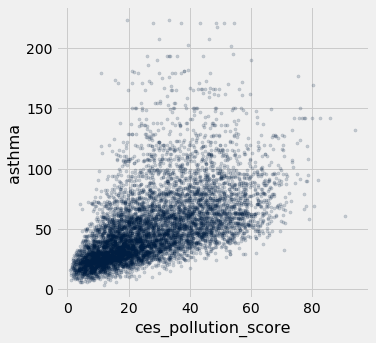

In [42]:
clean_ces_data.scatter("ces_pollution_score", "asthma", alpha = .18, s = 10)

#### Based on this scatter plot, what do you think the r-value is?
In other words, about how closely are pollution and asthma related? Compare this graph with the charts above to help you identify the **type** (Positive? Negative?) and **strength** (value) of the relationship.

*Your Guess Here*

#### Correlation Function!

To see how well your guess matches the actual r-value, we can use the `correlation` function defined below. 

In [46]:
#Run me to find the actual correlation coefficient!
correlation(clean_ces_data, 'ces_pollution_score', 'asthma')

0.5452274394377603

It's certainly not perfect -- if you are given a pollution score, you can't say that the number of reported asthma attacks **will definitely** be \_\_. However, you can see (both from the plot and from the calculated r-value) that there is a positive relationship between a census tract's pollution score and the number of reported asthma attacks.


---

## Your Turn!

In previous example, we explored the relationship between an environmental outcome and a health issue. Now let's look at how this health issue compares with a certain demographic.

r:  0.4986847676603604


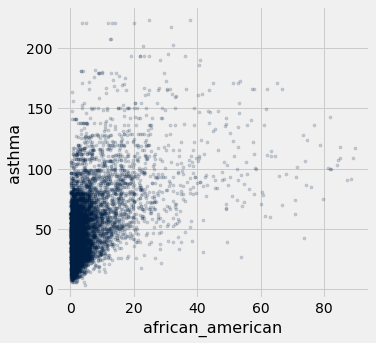

In [47]:
# This will find the correlation coefficient between African Americans and Asthma.
print('r: ', correlation(clean_ces_data, 'african_american', 'asthma'))
clean_ces_data.scatter("african_american", "asthma", alpha = .18, s = 10)

`r:  0.4986847676603604`

Since our r-value is low (far from 1) it shows us that we need to conduct more analysis because a single variable is not sufficient to predict asthma. Usually, there are multiple factors that affect an outcome so it makes sense that we need to do more than a simple analysis. Choose factors you want to see the relationship of and enter them in the call below!

In [ ]:
#Replace the ... with the columns you want to look at.
print('r: ', correlation(clean_ces_data, '...', '...'))
clean_ces_data.scatter("african_american", "asthma", alpha = .18, s = 10)

---

**CONGRATULATIONS!!!** You've made it through an introduction to correlation! 

---

**Citation:**

- [DS Modules](https://github.com/ds-modules)
- Online Statistics Education: A Multimedia Course of Study (http://onlinestatbook.com/)
- Pierce, Rod. "Correlation" Math Is Fun. Ed. Rod Pierce. 5 Nov 2018. 16 Feb 2019 <http://www.mathsisfun.com/data/correlation.html>

*Notebook developed by: Aarish Irfan, Alleanna Clark & Keiko Kamei*